In [27]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda
import datetime
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import shapely.geometry as shpg
import ee
import fiona
from shapely import geometry
#from gee_library import *
import geojson

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

ModuleNotFoundError: No module named 'geojson'

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:

# Trigger the authentication flow.
ee.Authenticate()


Enter verification code: 4/1AX4XfWiPlHtY2gxryVqLSBNVe6qxLu-xNWbVveMhWSxf9-oHpJB8mXN-MrQ

Successfully saved authorization token.


In [4]:
# Initialize the library.
ee.Initialize()

In [5]:
# # Import the MODIS land cover collection.
# lc = ee.ImageCollection('MODIS/006/MCD12Q1')

# # Import the MODIS land surface temperature collection.
# lst = ee.ImageCollection('MODIS/006/MOD11A1')

# Import the USGS ground elevation image.
elv = ee.Image('USGS/SRTMGL1_003')


In [8]:
# Import the USGS ground elevation image.
lst = ee.ImageCollection('NASA/GPM_L3/IMERG_V06')

In [49]:
# //creation of temporal filters
# var rYear = ee.Filter.calendarRange(2017,2017,'year'); //year 2017
# var rMonth = ee.Filter.calendarRange(9,9,'month'); //september
# var rHour = ee.Filter.calendarRange(22,11,'hour'); // nocturnal hour range in UTC (local time: UTC-3)

# //filter collection by temporal range
# var night = GOES16.filter(rYear).filter(rMonth).filter(rHour);

In [50]:
# ee.Filter.calendarRange(22,11,'hour') filters nighttime

In [51]:
rHour = ee.Filter.calendarRange(18,19,'hour')

In [52]:
rHour

In [53]:
# Initial date of interest (inclusive).
i_date = '2000-01-01'

# Final date of interest (exclusive).
f_date = '2020-01-01'

# Selection of appropriate bands and dates for LST.

lst = lst.select('HQprecipitation').filterDate(i_date, f_date).filter(rHour)


In [59]:
# Print the elevation near Lyon, France.
test = lst.mean().sample(u_poi, 10).first().get('HQprecipitation').getInfo()
print('Ground elevation at urban point:', test, 'm')


Ground elevation at urban point: 0.09095852077007294 m


In [54]:
lst

In [13]:
# shp = '/home/ck/DIR/cornkle/data/HUARAZ/shapes/riosan_sel_one.shp'

In [16]:
# shpfile = fiona.open(shp, "r")

In [30]:
# features = [feature["geometry"] for feature in shpfile] 

In [42]:
# aa=geometry.Polygon(features[0]['coordinates'][0])
# bb=aa.bounds
# ll=(bb[0],bb[1])
# ur=(bb[2],bb[3])
# nps_bounds = bound_geometry(ll,ur)

AttributeError: module 'ee' has no attribute 'bound_geometry'

In [ ]:
huaraz = latitude=-9.3, longitude=-77.5

In [44]:
# aa=geometry.Polygon(features[0]['coordinates'][0])
#     bb=aa.bounds
#     ll=(bb[0],bb[1])
#     ur=(bb[2],bb[3])
#     nps_bounds = bound_geometry(ll,ur)
#     print filename
#     #print(nps_bounds)
#     grid_collection = collection.filterBounds(nps_bounds)
#     tr_cr = grid_collection.filter(ee.Filter.date('2013-01-01', '2016-01-01'))

In [45]:
# Define the urban location of interest as a point near Lyon, France.
u_lon = -77.5
u_lat = -9.3
u_poi = ee.Geometry.Point(u_lon, u_lat)

In [47]:
# Define a region of interest with a buffer zone of 1000 km around Lyon.
roi = u_poi.buffer(1e1)

In [57]:
# Get the data for the pixel intersecting the point in urban area.
scale =1
lst_u_poi = lst.getRegion(u_poi, scale).getInfo()

EEException: User memory limit exceeded.

In [ ]:
# Preview the result.
lst_u_poi[:5]

/home/ck/miniconda3/lib/python3.7/site-packages/descartes/patch.py:87: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return PathPatch(PolygonPath(polygon), **kwargs)


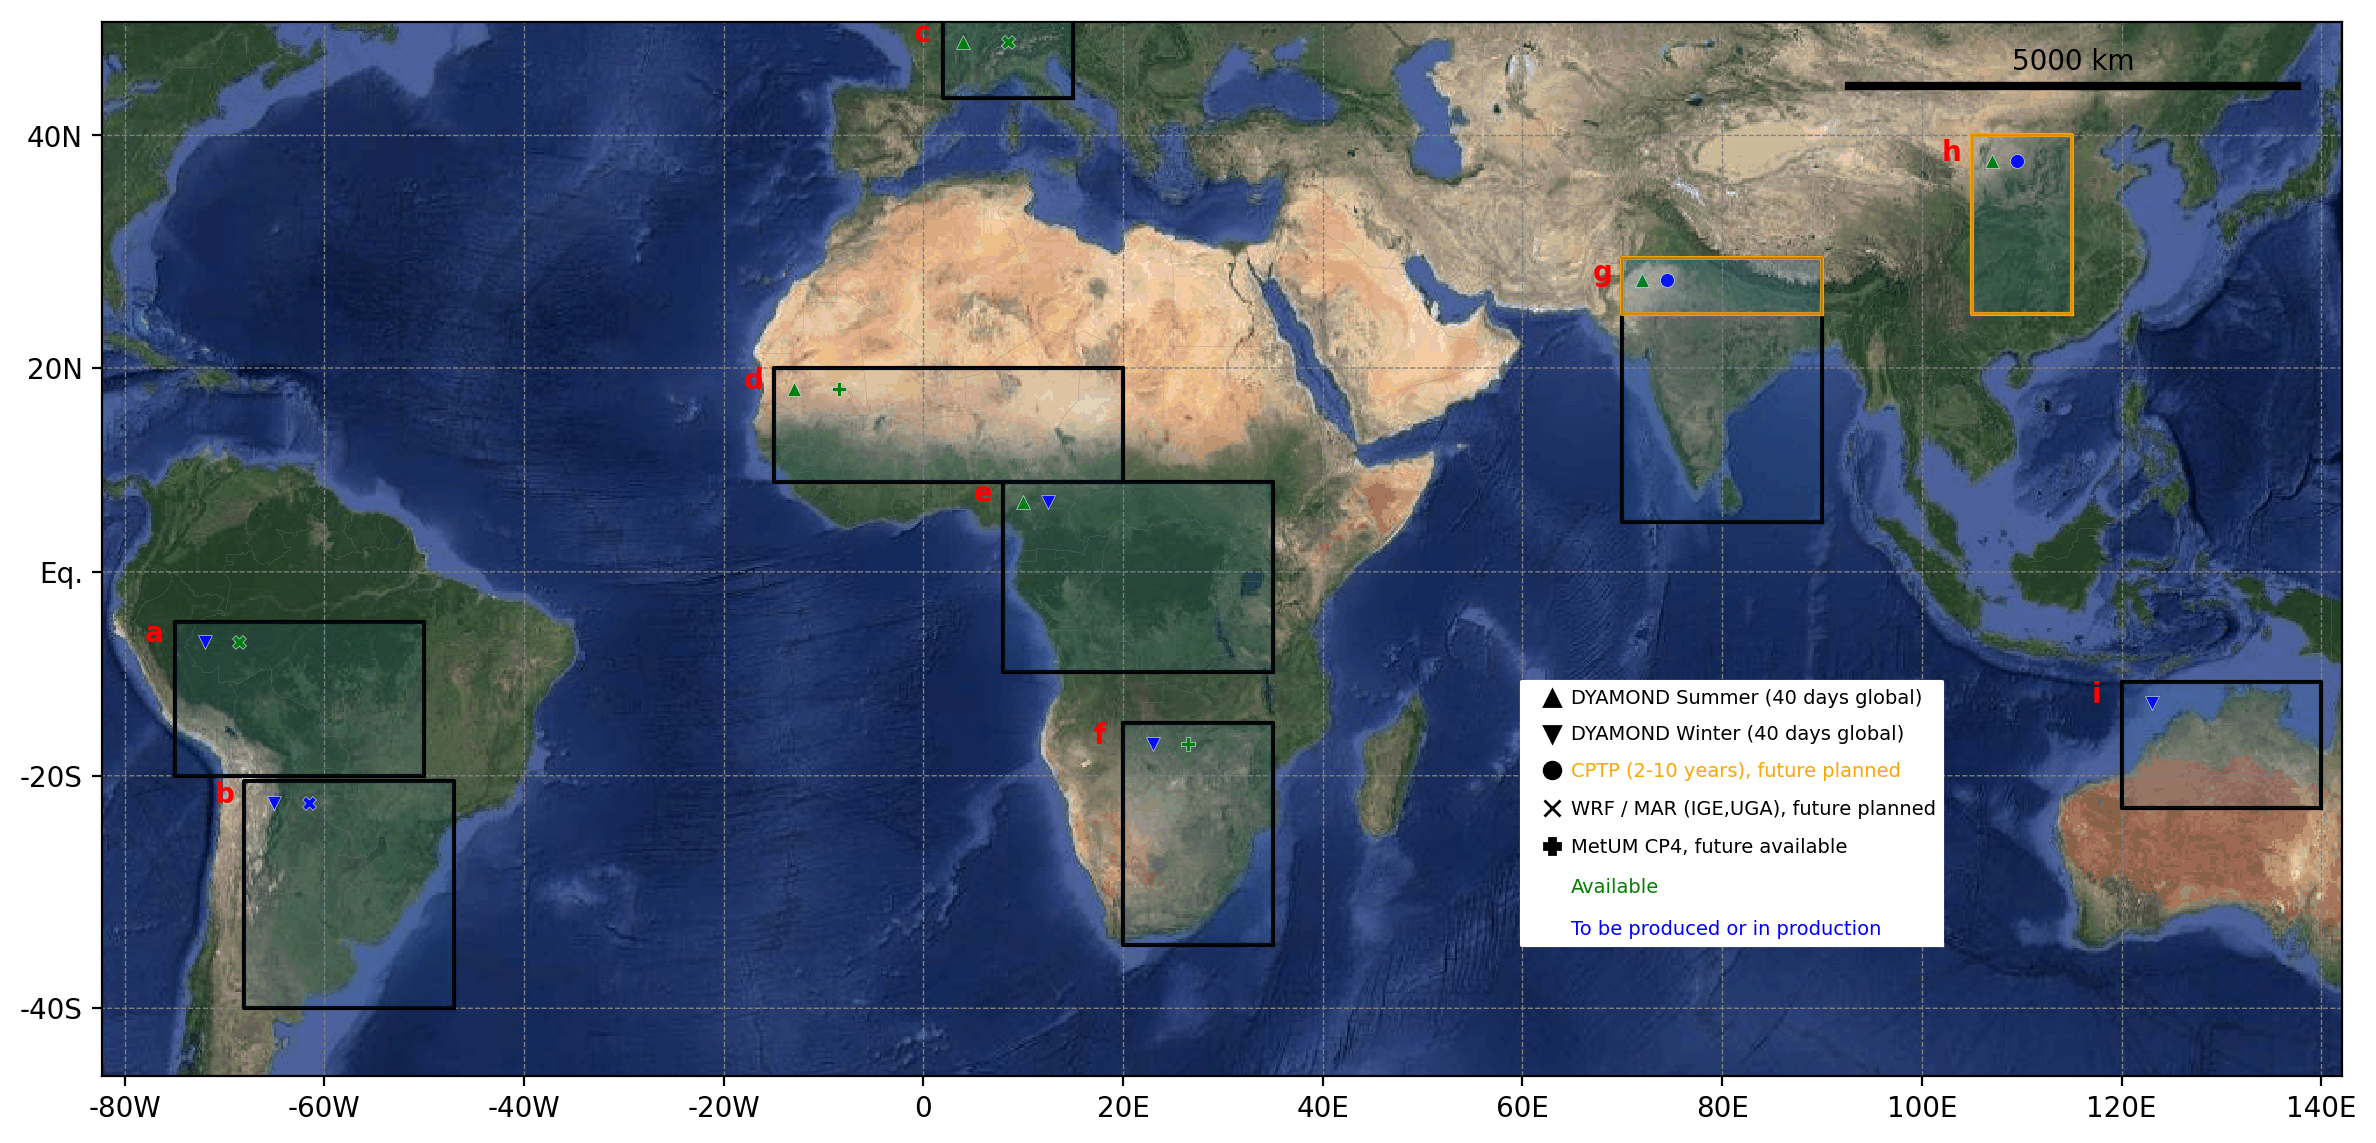

In [34]:
regions = {
    'india' : ([70,90, 5,30], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b') , ("o", 'b'), ("", 'g'), 'g', ''),
    'india_cptp' : ([70,90, 25,30], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b') , ("o", 'b'), ("", 'g'), '', 'fu'),
    #'cptp' : ([70,115,25,40], 'blue', 'dashed', 2, ('o', 'k')),
    'china' : ([105,115,25,40], 'k', 'solid', 0.8, ("^", 'g') , ("", 'b') , ("o", 'b'), ("", 'g'), 'h', 'fu'),
    'australia' : ([120,140,-23, -11], 'k', 'solid', 0.8, ('', 'k'), ("v", 'b') , ("", 'b'), ("", 'g'), 'i', ''),
    'sa' : ([20,35, -35,-15], 'k', 'solid', 0.8, ('', 'k'), ("v", 'b'),  ("", 'b'), ("P", 'g'), 'f' , 'fu'),
#     'sub_ssa_p' : ([-68,-47, -40, -20.5], 'purple', 'solid', 1.5, ('', 'k'), ("v", 'b') ,  ("", 'b'), ("X", 'b'), 'e', 'fu'),
#     'trop_ssa_p' : ([-75, -50, -20, -5], 'purple', 'solid', 1.5, ('', 'g'), ("v", 'b'), ("", 'b') , ("X", 'g'), 'd', 'fu'),
    'sub_ssa' : ([-68,-47, -40, -20.5], 'k', 'solid', 0.8, ('', 'k'), ("v", 'b') ,  ("", 'b'), ("X", 'b'), 'b', 'fu'),
    'trop_ssa' : ([-75, -50, -20, -5], 'k', 'solid', 0.8, ('', 'g'), ("v", 'b'), ("", 'b') , ("X", 'g'), 'a', 'fu'),
    'sahel' : ([-15, 20, 9, 20], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b'), ("", 'b') , ("P", 'g'), 'd', 'fu'),
    'alps' : ([2, 15, 42.8, 48.8], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b'), ("", 'b') , ("X", 'g'), 'c', 'fu'),
    'congo' : ([8, 35, -10, 9], 'k', 'solid', 0.8, ("^", 'g'), ("", 'b'), ("v", 'b') , ("", 'g'), 'e', 'fu')
    }


f = plt.figure(figsize=(12,6), dpi=200)
ax1 = f.add_subplot(111)
# make a map of the same size as the image (no country borders)



sm = Map(g.grid, factor=1)
# Change the country borders
sm.set_shapefile()
sm.set_shapefile(countries=True, color='grey', linewidths=0.05)

# Change the lon-lat countour setting
sm.set_lonlat_contours()
sm.set_lonlat_contours( interval=20, linewidths=0.5,
                         linestyles='dashed', colors='grey')

sm.set_rgb(ggl_img)  # add the background rgb image
sm.set_scale_bar(location=(0.88, 0.94))  # add scale
if tag == 'terrain':
    ec = 'k'
else:
    ec = 'w'
for reg in regions.keys():
        #sm.set_geometry()
        coord = (regions[reg])[0]
        #ipdb.set_trace()
        geom = shpg.box(coord[0], coord[2], coord[1], coord[3])
        if (reg == 'india_cptp') | (reg=='china'):
            edc = 'orange'
        else:
            edc = (regions[reg])[1]
            
            
        futag = (regions[reg])[9]
        if futag=='fu':
            ec = 'w'
        else:
            ec = 'w'
        sm.set_geometry(geom, zorder=99, facecolor=None,edgecolor=edc, linewidth=(regions[reg])[3], linestyle=(regions[reg])[2], alpha=0.1) 
        
        x, y = sm.grid.transform(coord[0]-3, coord[3]-2)
        plt.text(x,y,(regions[reg])[8], fontweight='bold', color='red')

        points = (regions[reg])[4]
        x, y = sm.grid.transform(coord[0]+2, coord[3]-2)
        plt.scatter(x, y, color=points[1],marker=points[0], s=25, edgecolor=ec, linewidth=0.2)
        
        points = (regions[reg])[5]
        x, y = sm.grid.transform(coord[0]+3, coord[3]-2)
        plt.scatter(x, y, color=points[1],marker=points[0], s=25, edgecolor=ec, linewidth=0.2)
        
        points = (regions[reg])[6]
        x, y = sm.grid.transform(coord[0]+4.5, coord[3]-2)
        plt.scatter(x, y, color=points[1],marker=points[0], s=25, edgecolor=ec, linewidth=0.2)
        
        points = (regions[reg])[7]
        x, y = sm.grid.transform(coord[0]+6.5, coord[3]-2)
        plt.scatter(x, y, color=points[1],marker=points[0], s=25, edgecolor=ec, linewidth=0.2)

   
boxed = shpg.box(60, -35, 102, -11)
sm.set_geometry(boxed, facecolor='white',edgecolor='white', color='white', fill=True, zorder=98)
        
lon,lat = 63, -12.5
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='^', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'DYAMOND Summer (40 days global)', fontsize=7, zorder=99)

lon,lat = 63, -16
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='v', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'DYAMOND Winter (40 days global)', fontsize=7, zorder=99)

lon,lat = 63, -19.5
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='o', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'CPTP (2-10 years), future planned', fontsize=7, zorder=99, color='orange')

lon,lat = 63, -23
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='x', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'WRF / MAR (IGE,UGA), future planned', fontsize=7, zorder=99)

lon,lat = 63, -26.5
x, y = sm.grid.transform(lon, lat)
plt.plot(x,y,color='k', marker='P', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'MetUM CP4, future available', fontsize=7, zorder=99, color='k')

lon,lat = 63, -30
x, y = sm.grid.transform(lon, lat)
#plt.plot(x,y,color='k', marker='x', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'Available', fontsize=7, zorder=99, color='g')

lon,lat = 63, -33.5
x, y = sm.grid.transform(lon, lat)
#plt.plot(x,y,color='k', marker='x', zorder=99)
x, y = sm.grid.transform(lon+1.5, lat-1)
plt.text(x+2, y-2.5, 'To be produced or in production', fontsize=7, zorder=99, color='b')

# lon,lat = 63, -37
# x, y = sm.grid.transform(lon, lat)
# #plt.plot(x,y,color='k', marker='x', zorder=99)
# x, y = sm.grid.transform(lon+1.5, lat-1)
# plt.text(x+2, y-2.5, 'Future projections planned / available', fontsize=7, zorder=99, color='orange')


sm.visualize()  # plot it
plt.tight_layout()
f.savefig('/home/ck/OneDrive/Documents/applications/Grenoble_concours/CNRS_regions_plot_'+tag+'.jpg')